<a href="https://colab.research.google.com/github/pragatipatel26/Predictive-Analytics-and-Readmission-Analysis-for-Diabetes-Management/blob/main/Readmission_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import zipfile
import io
import pandas as pd

zip_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"

# Send a HTTP request to the URL
response = requests.get(zip_url)
# Check if the request was successful
if response.status_code == 200:
    # Open the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        # Extract 'diabetic_data.csv' and load it into a DataFrame
        with thezip.open('dataset_diabetes/diabetic_data.csv') as myfile:
            df_actual = pd.read_csv(myfile)
else:
    print("Failed to download the file")


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filling missing values in 'A1Cresult' with 'none'
df_actual['A1Cresult'] = df_actual['A1Cresult'].fillna('none')

# Grouping primary diagnosis codes into broader categories
def categorize_diag(diag):
    if diag.startswith('250'):
        return 'Diabetes'
    elif diag.startswith(('390', '459')):
        return 'Circulatory'
    elif diag.startswith(('460', '519')):
        return 'Respiratory'
    else:
        return 'Other'

df_actual['diag_group'] = df_actual['diag_1'].apply(categorize_diag)

In [10]:
# Bivariate Analysis: HbA1c vs Medication Change
a1c_med_change = pd.crosstab(df_actual['A1Cresult'], df_actual['change'], normalize='index')
print("\nA1Cresult vs Medication Change:\n", a1c_med_change)


A1Cresult vs Medication Change:
 change           Ch        No
A1Cresult                    
>7         0.507608  0.492392
>8         0.651047  0.348953
Norm       0.442084  0.557916
none       0.442736  0.557264


In [11]:
# Analysis: Measured vs Not Measured HbA1c and Medication Change
df_actual['A1C_measured'] = df_actual['A1Cresult'].apply(lambda x: 'Measured' if x != 'none' else 'Not Measured')
a1c_measured_med_change = pd.crosstab(df_actual['A1C_measured'], df_actual['change'], normalize='index')
print("\nA1C Measured vs Medication Change:\n", a1c_measured_med_change)


A1C Measured vs Medication Change:
 change              Ch        No
A1C_measured                    
Measured      0.557645  0.442355
Not Measured  0.442736  0.557264


In [12]:
# Analysis: Measured vs Not Measured HbA1c and Readmission
a1c_measured_read = pd.crosstab(df_actual['A1C_measured'], df_actual['readmitted'], normalize='index')
print("\nA1C Measured vs Readmission:\n", a1c_measured_read)



A1C Measured vs Readmission:
 readmitted         <30       >30        NO
A1C_measured                              
Measured      0.098484  0.340816  0.560700
Not Measured  0.114233  0.350982  0.534785


In [13]:
# Trivariate Analysis: A1C Measured vs Readmission stratified by Primary Diagnosis
a1c_measured_read_diag = pd.crosstab([df_actual['A1C_measured'], df_actual['diag_group']], df_actual['readmitted'], normalize='index')
print("\nA1C Measured vs Readmission stratified by Primary Diagnosis:\n", a1c_measured_read_diag)


A1C Measured vs Readmission stratified by Primary Diagnosis:
 readmitted                     <30       >30        NO
A1C_measured diag_group                               
Measured     Circulatory  0.000000  0.500000  0.500000
             Diabetes     0.095428  0.339985  0.564586
             Other        0.099207  0.340939  0.559854
             Respiratory  0.000000  0.142857  0.857143
Not Measured Circulatory  0.094118  0.364706  0.541176
             Diabetes     0.145642  0.396767  0.457590
             Other        0.111850  0.347494  0.540656
             Respiratory  0.128205  0.307692  0.564103


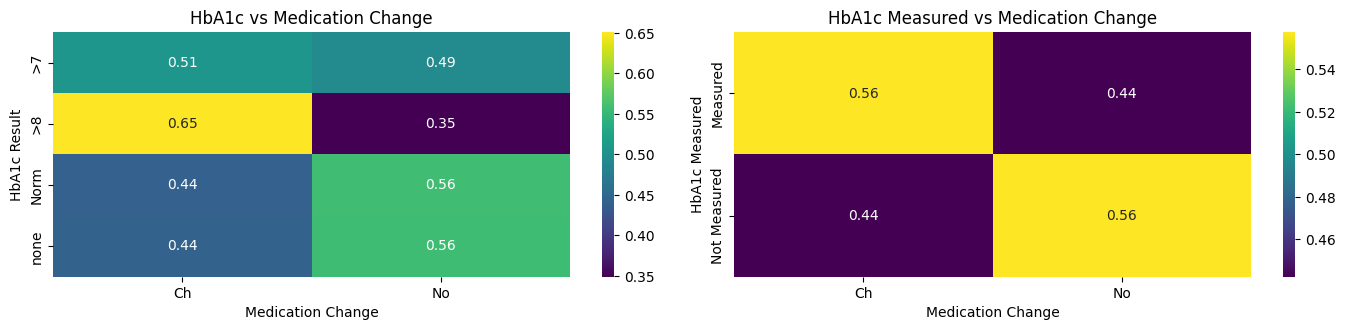

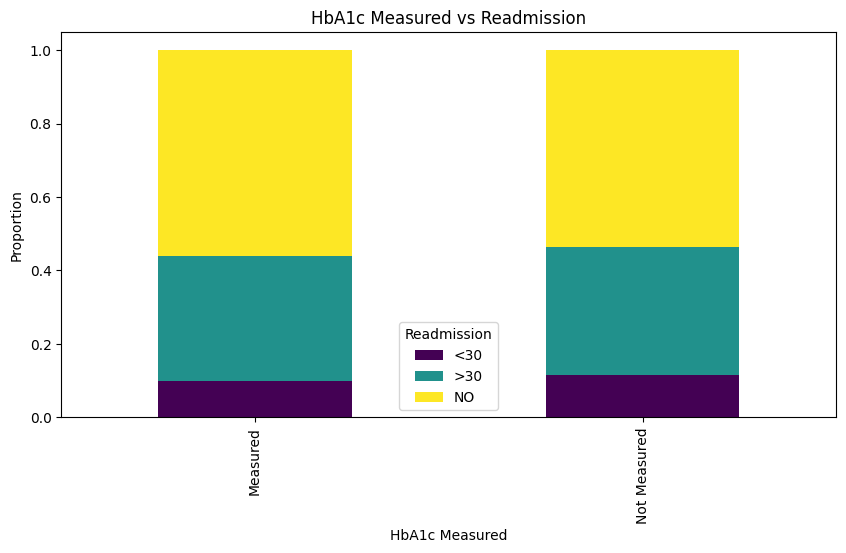

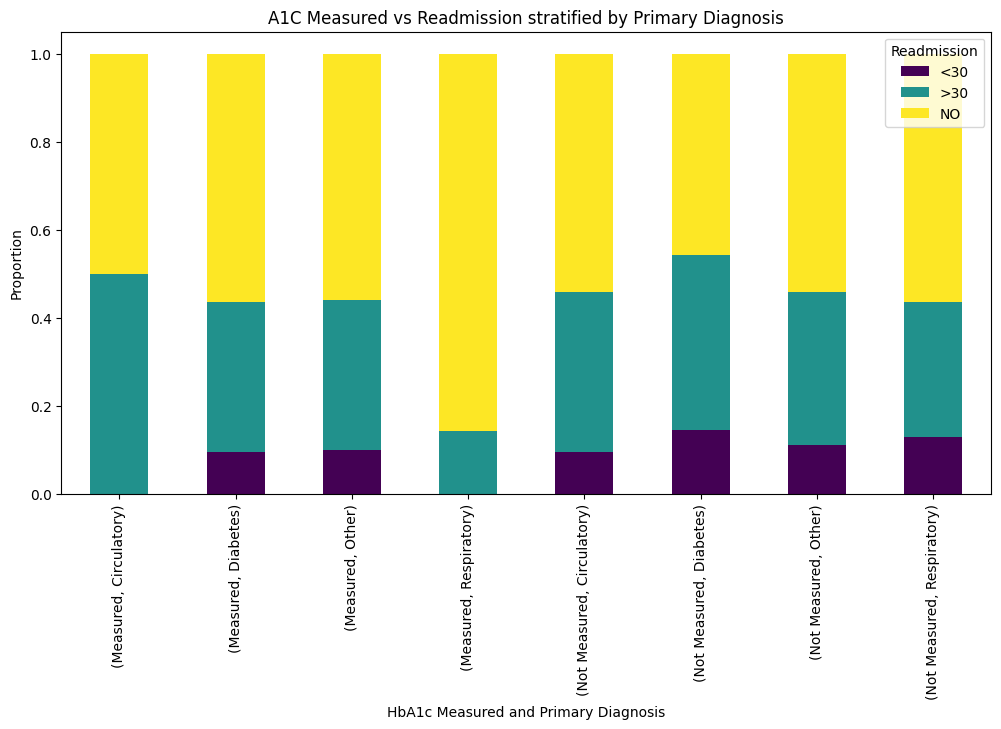

In [14]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Heatmap for HbA1c vs Medication Change
plt.subplot(2, 2, 1)
sns.heatmap(a1c_med_change, annot=True, cmap='viridis')
plt.title('HbA1c vs Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('HbA1c Result')

# Heatmap for HbA1c Measured vs Medication Change
plt.subplot(2, 2, 2)
sns.heatmap(a1c_measured_med_change, annot=True, cmap='viridis')
plt.title('HbA1c Measured vs Medication Change')
plt.xlabel('Medication Change')
plt.ylabel('HbA1c Measured')

plt.tight_layout()
plt.show()

# Clustered Bar Plot for HbA1c Measured vs Readmission
a1c_measured_read.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 5))
plt.title('HbA1c Measured vs Readmission')
plt.xlabel('HbA1c Measured')
plt.ylabel('Proportion')
plt.legend(title='Readmission')
plt.show()


# Clustered Bar Plot for A1C Measured vs Readmission stratified by Primary Diagnosis
a1c_measured_read_diag.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('A1C Measured vs Readmission stratified by Primary Diagnosis')
plt.xlabel('HbA1c Measured and Primary Diagnosis')
plt.ylabel('Proportion')
plt.legend(title='Readmission')
plt.show()